In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("EDA.csv")
df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [3]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [4]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [5]:
df.shape

(19689, 10)

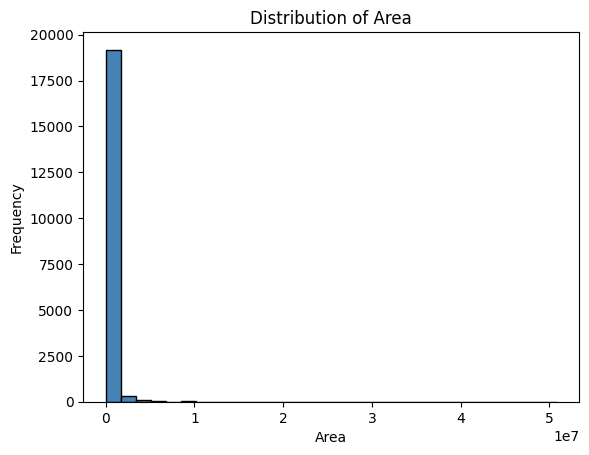

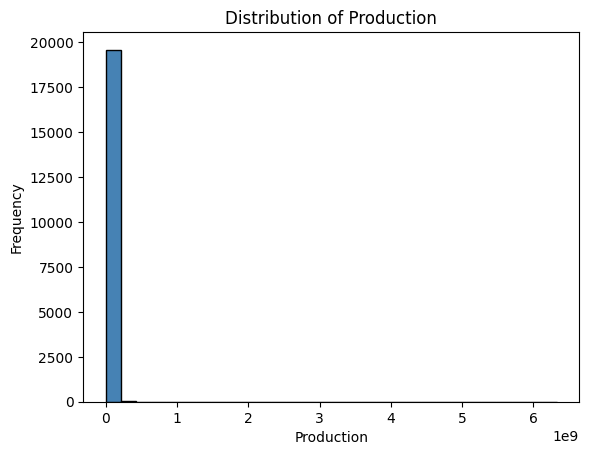

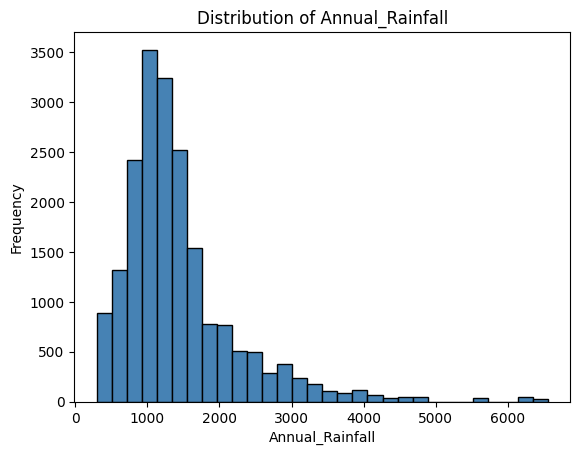

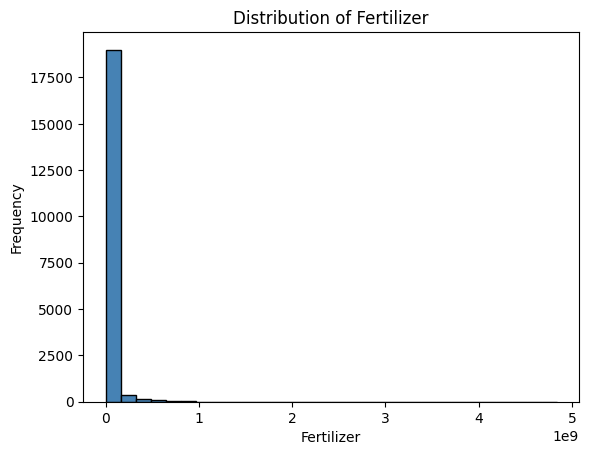

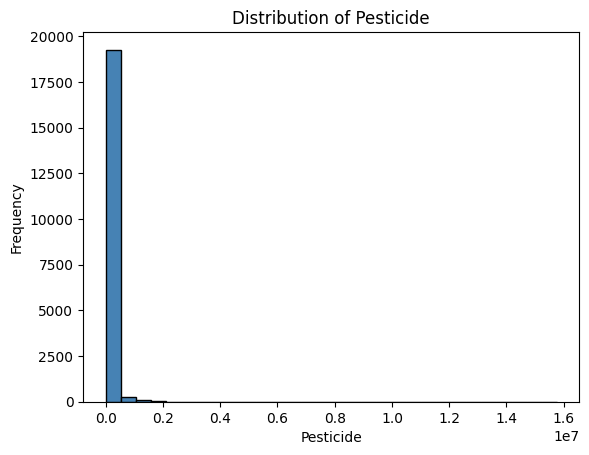

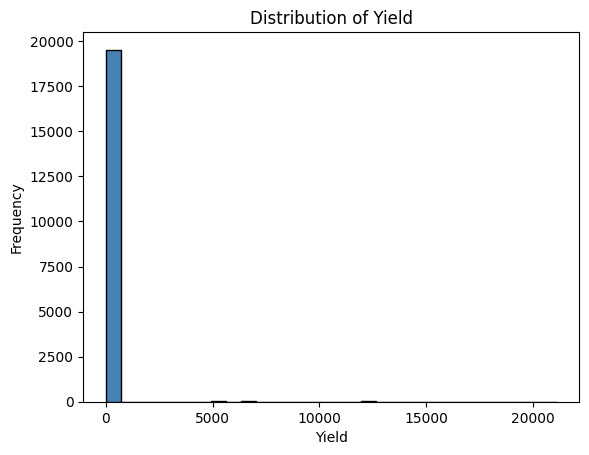

In [6]:
num_cols =["Area", "Production", "Annual_Rainfall", "Fertilizer", "Pesticide", "Yield"]
for col in num_cols:
    plt.hist(df[col].dropna(),bins=30, color='steelblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

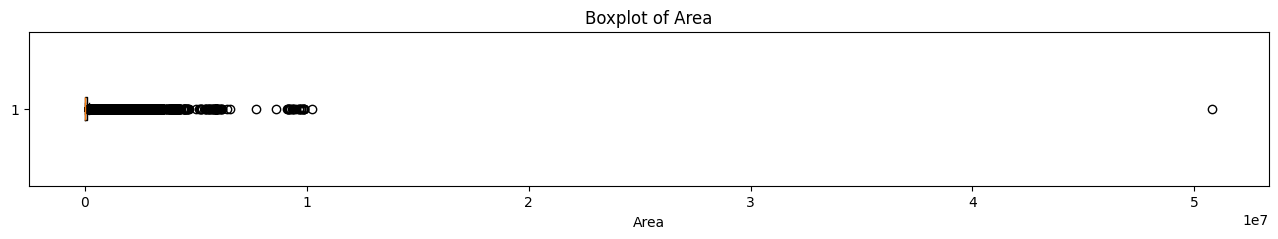

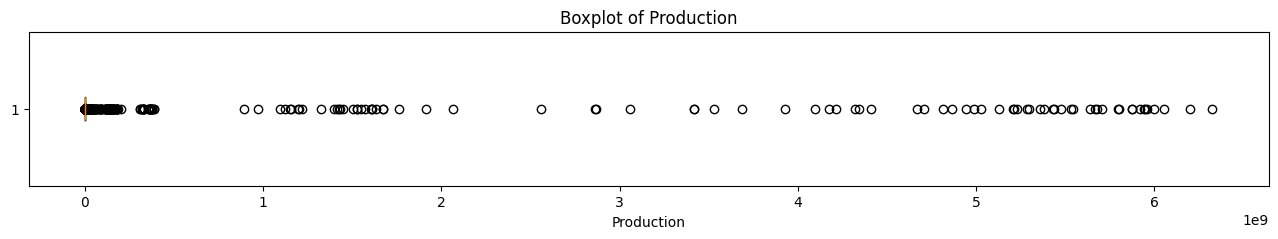

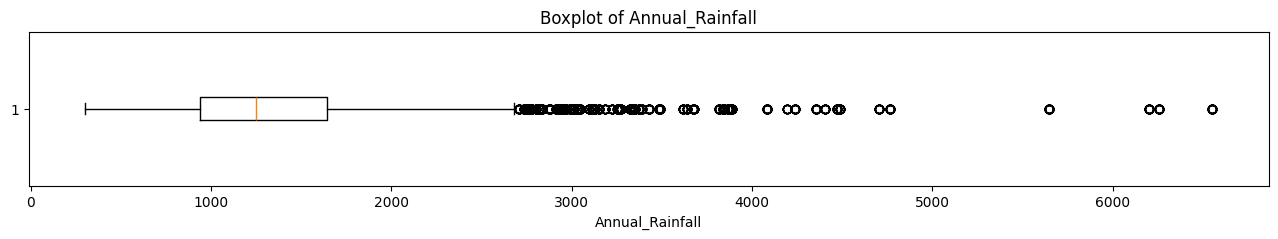

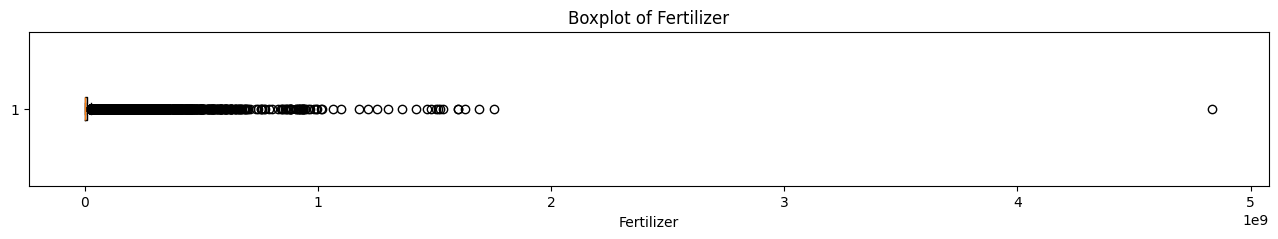

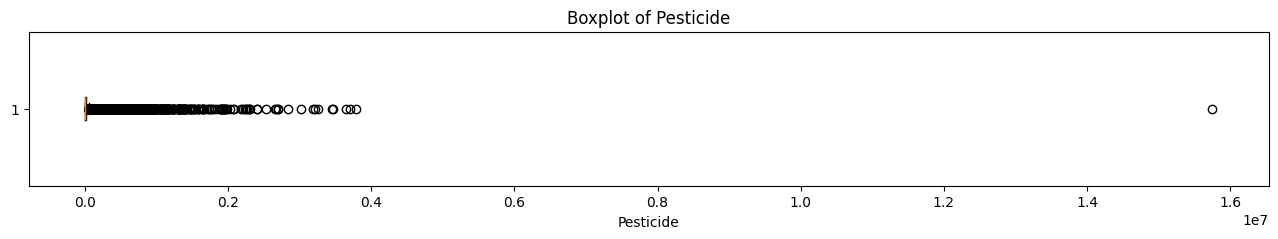

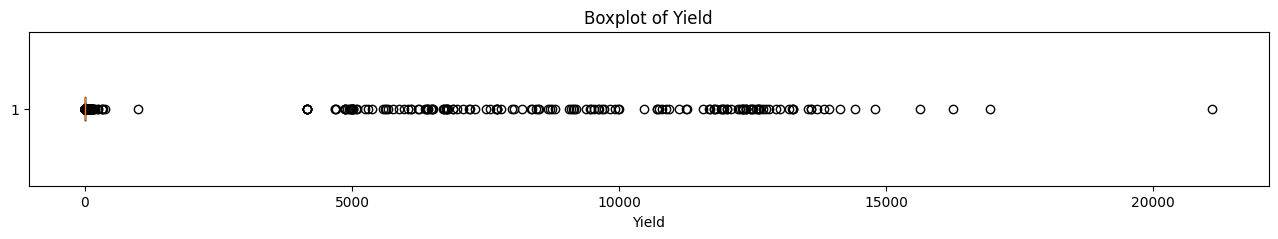

In [7]:
for col in num_cols:
    plt.figure(figsize=(16,2))
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

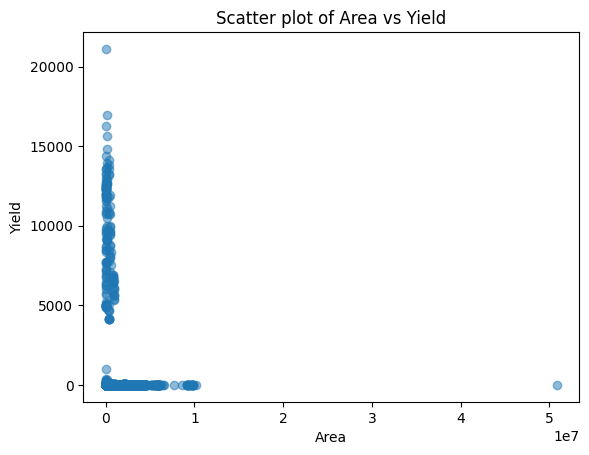

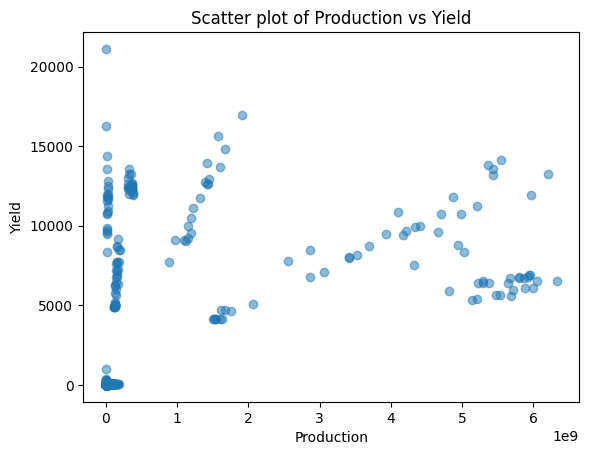

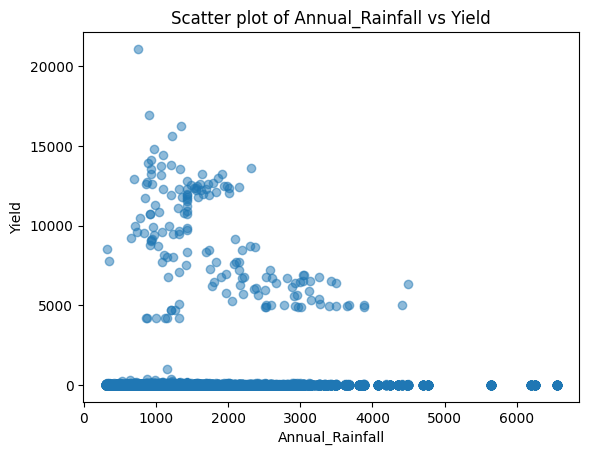

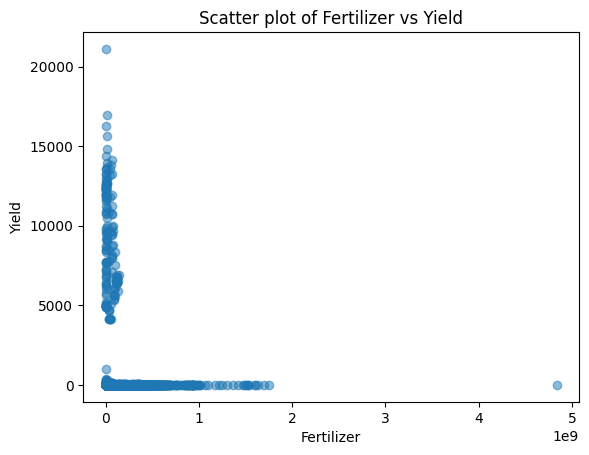

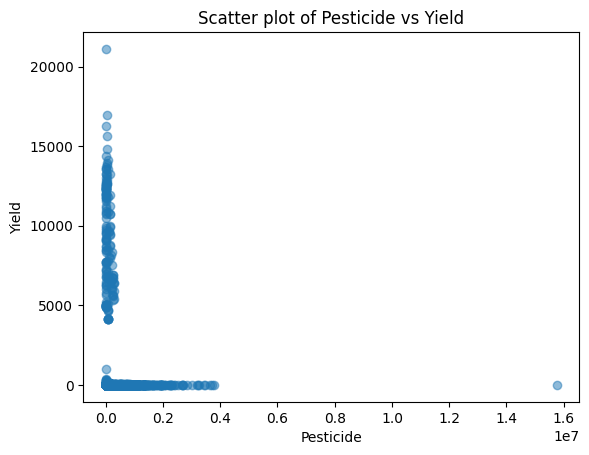

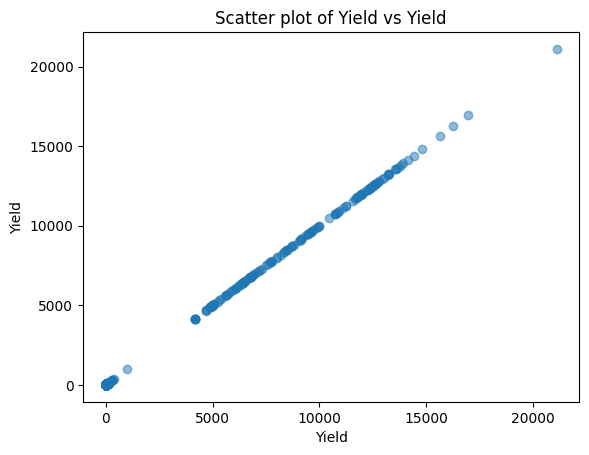

In [8]:
for col in num_cols:
    plt.scatter(df[col], df["Yield"], alpha=0.5)
    plt.title(f"Scatter plot of {col} vs Yield")
    plt.xlabel(col)
    plt.ylabel("Yield")
    plt.show()

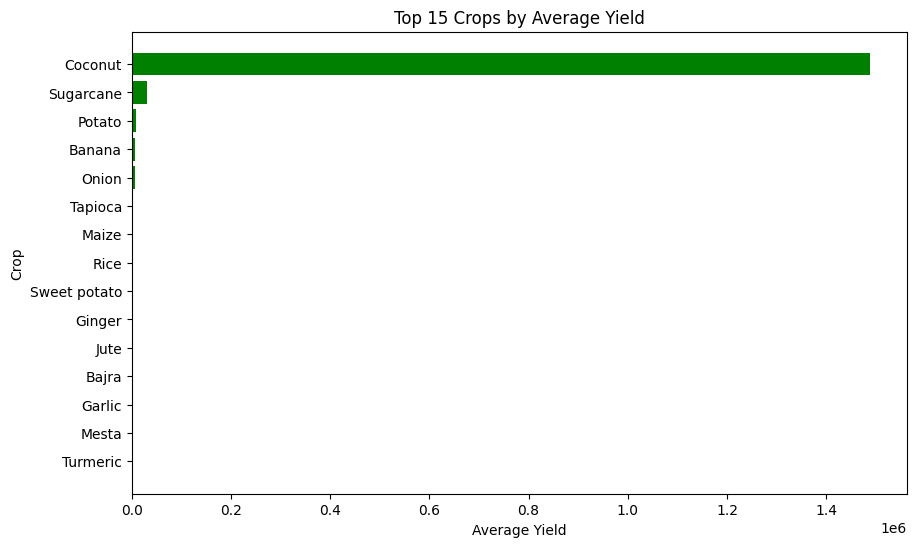

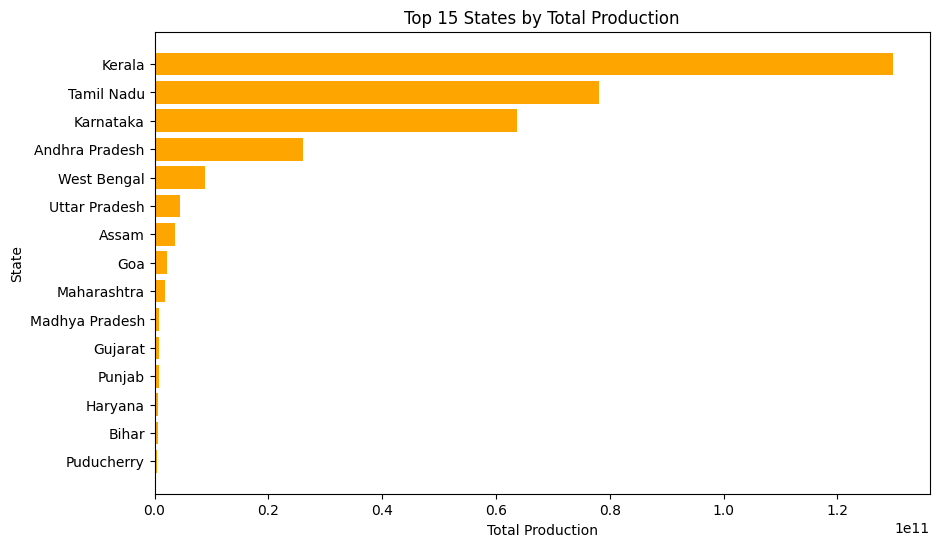

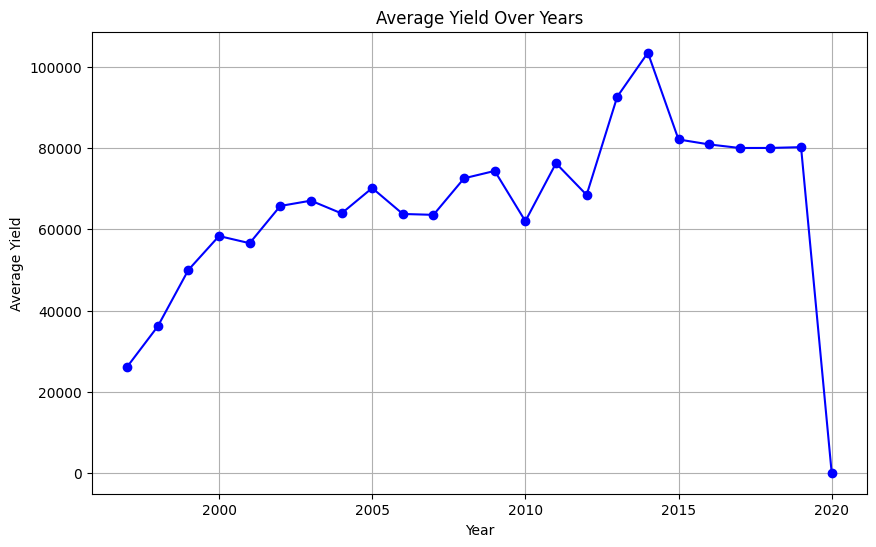

In [9]:
crop_yield = df.groupby("Crop")["Yield"].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
plt.barh(crop_yield.index, crop_yield.values, color="green")
plt.title("Top 15 Crops by Average Yield")
plt.xlabel("Average Yield")
plt.ylabel("Crop")
plt.gca().invert_yaxis()
plt.show()

state_prod = df.groupby("State")["Production"].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
plt.barh(state_prod.index, state_prod.values, color="orange")
plt.title("Top 15 States by Total Production")
plt.xlabel("Total Production")
plt.ylabel("State")
plt.gca().invert_yaxis()
plt.show()

year_yield = df.groupby("Crop_Year")["Yield"].sum()
plt.figure(figsize=(10,6))
plt.plot(year_yield.index, year_yield.values, marker="o", color="blue")
plt.title("Average Yield Over Years")
plt.xlabel("Year")
plt.ylabel("Average Yield")
plt.grid(True)
plt.show()

In [14]:
df = df[df['Crop'] != 'Coconut']
df = df[df['Yield'] < 5]
df = df[(df['Area'] > 500) & (df['Area'] < 1000000)]

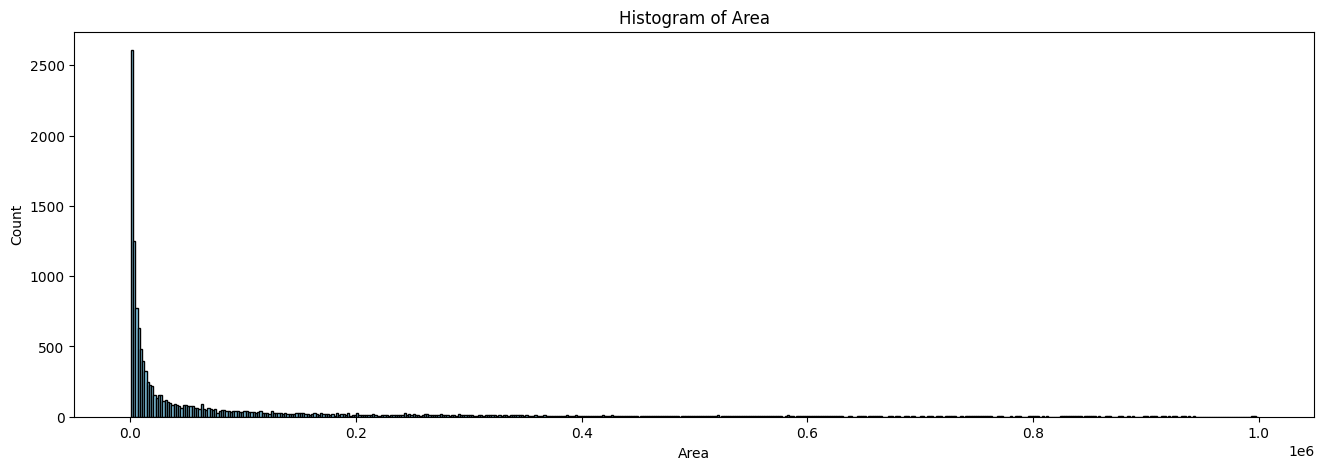

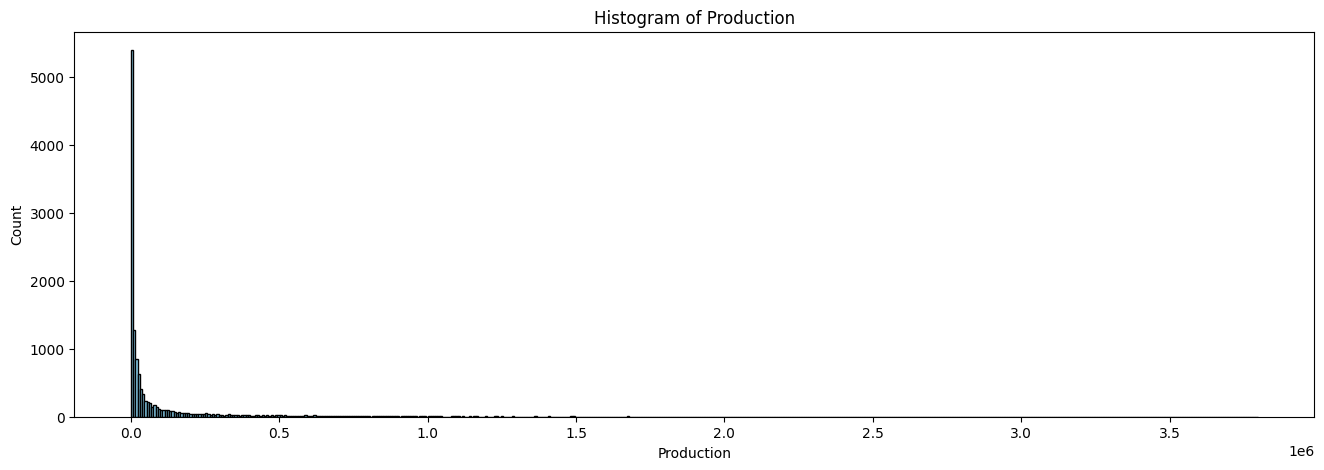

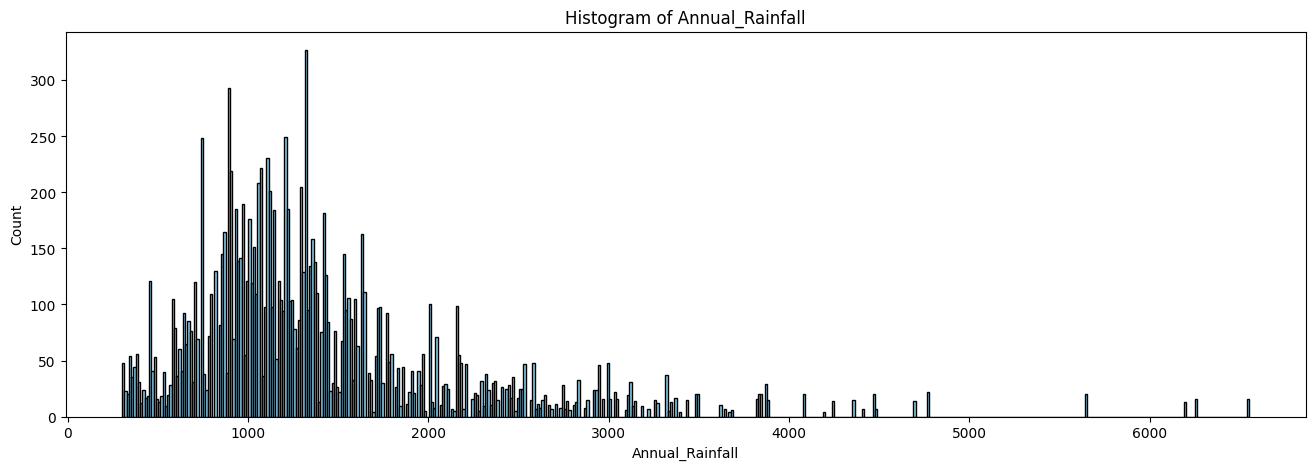

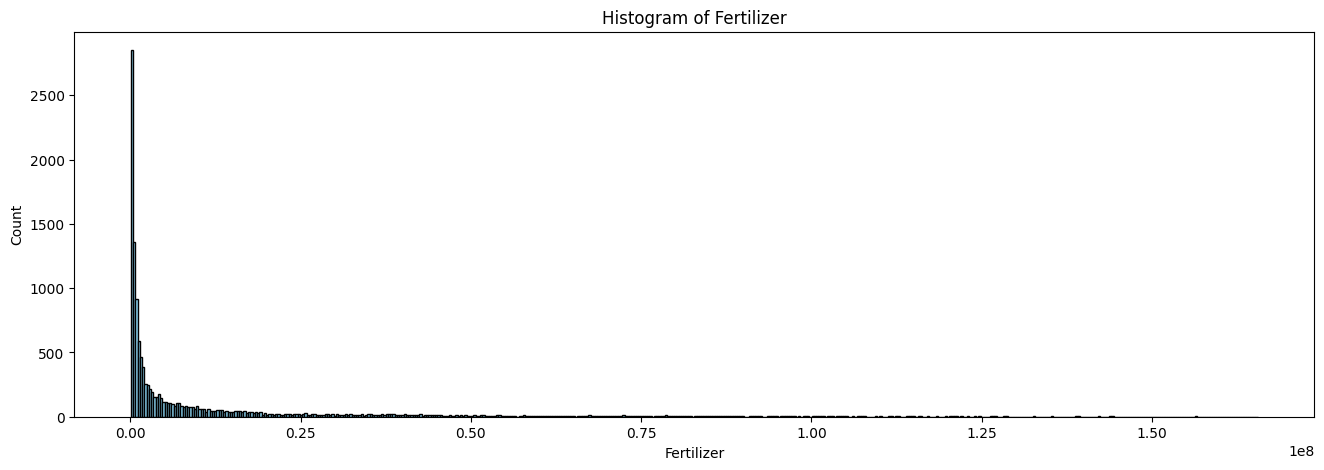

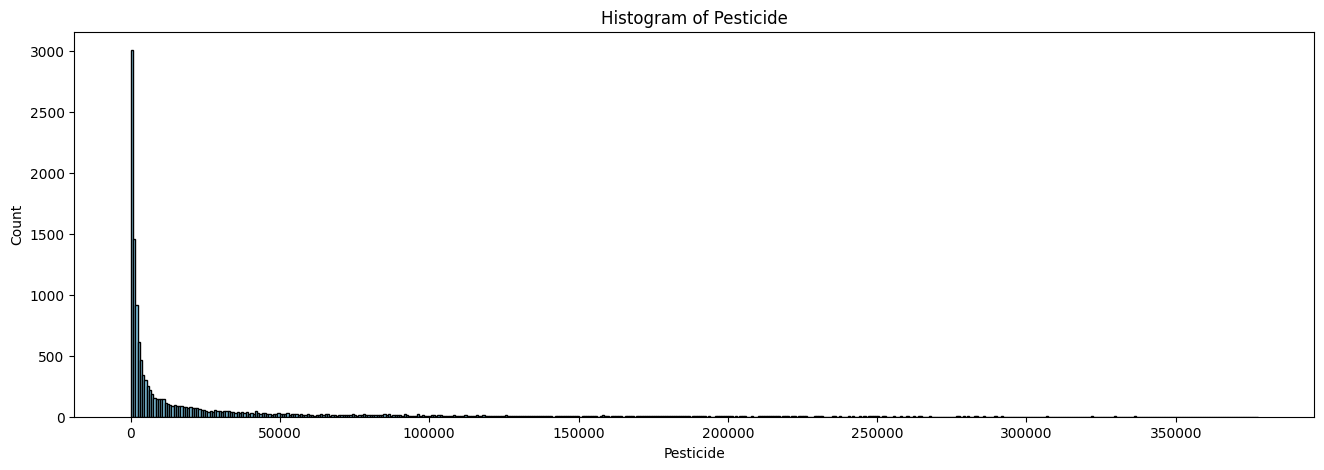

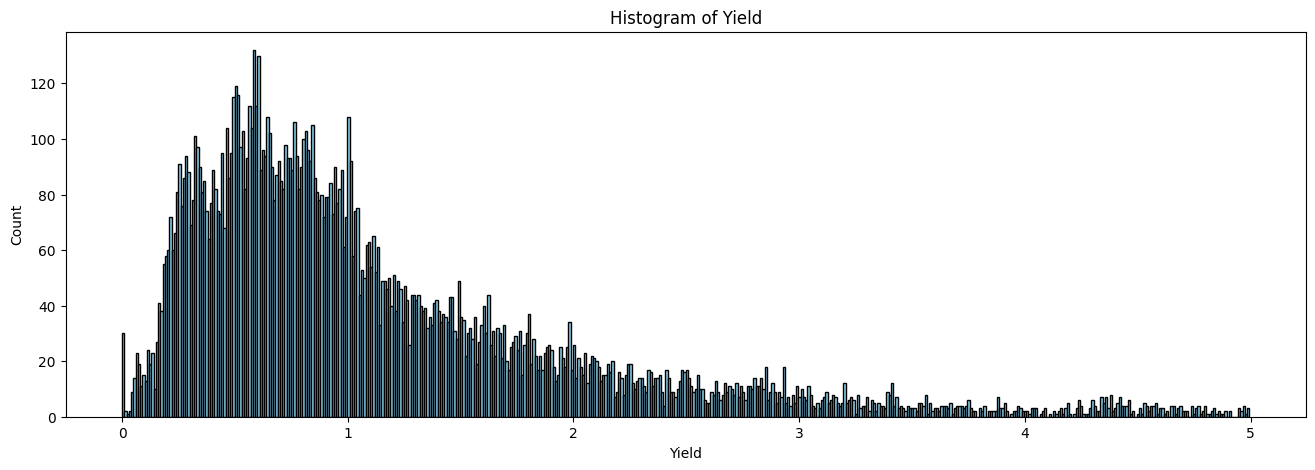

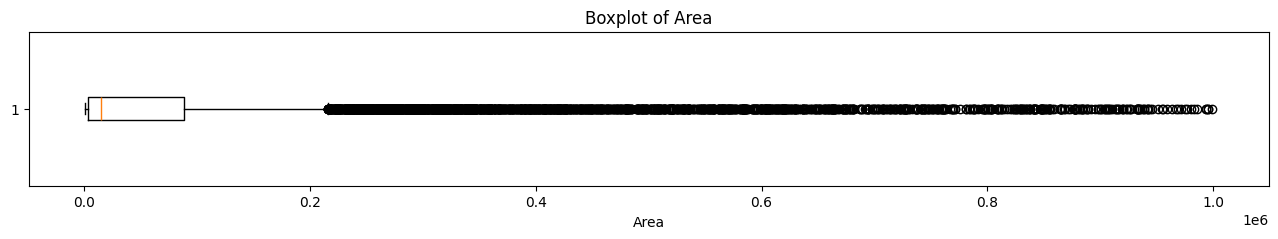

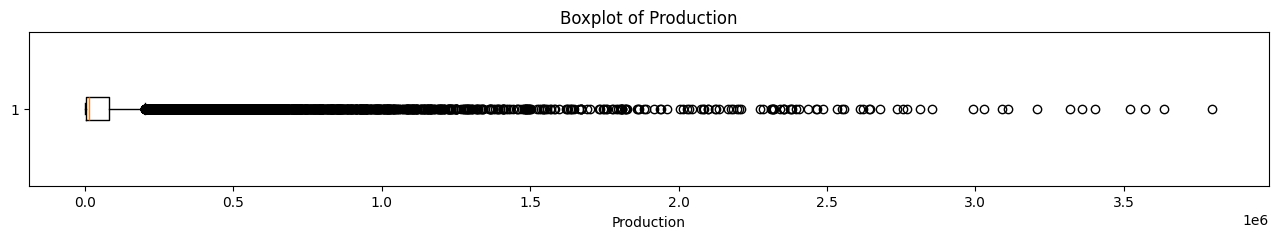

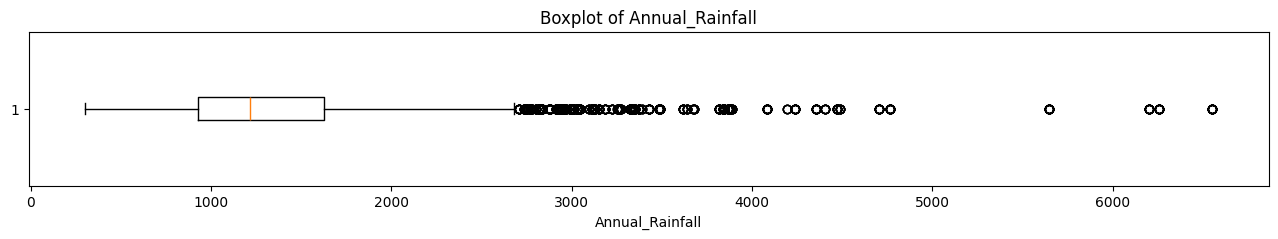

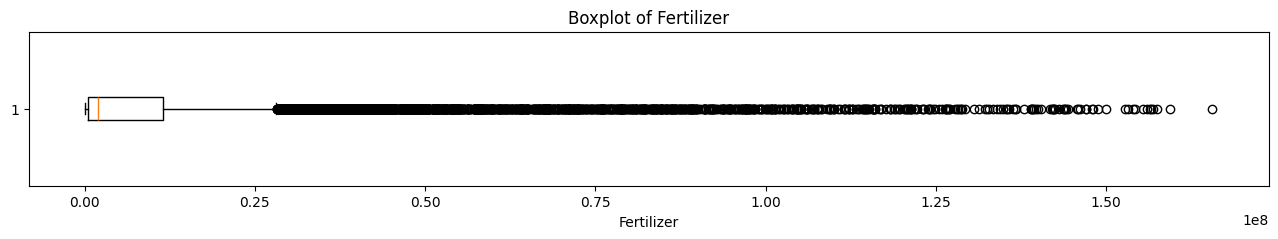

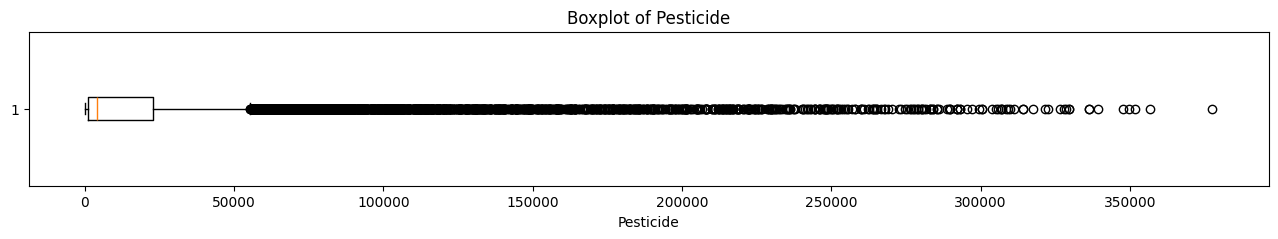

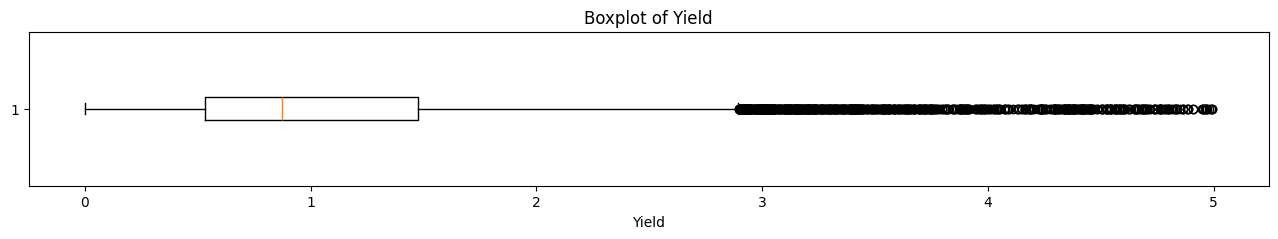

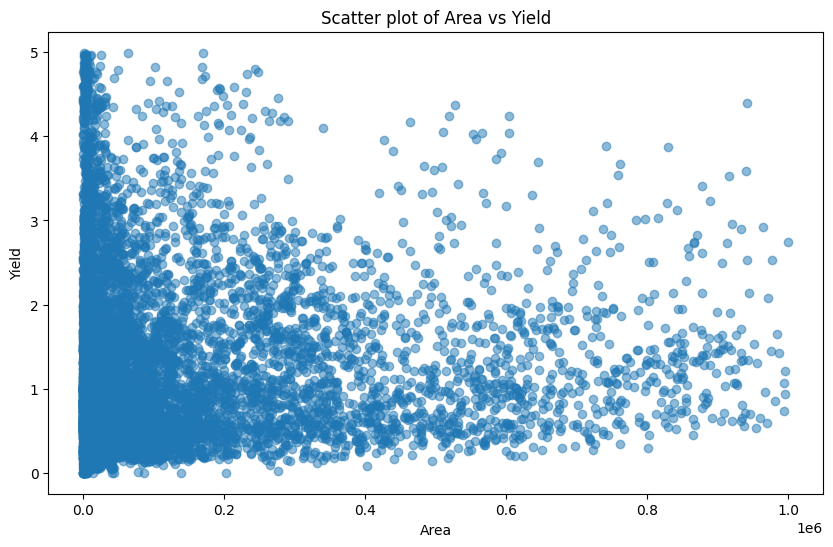

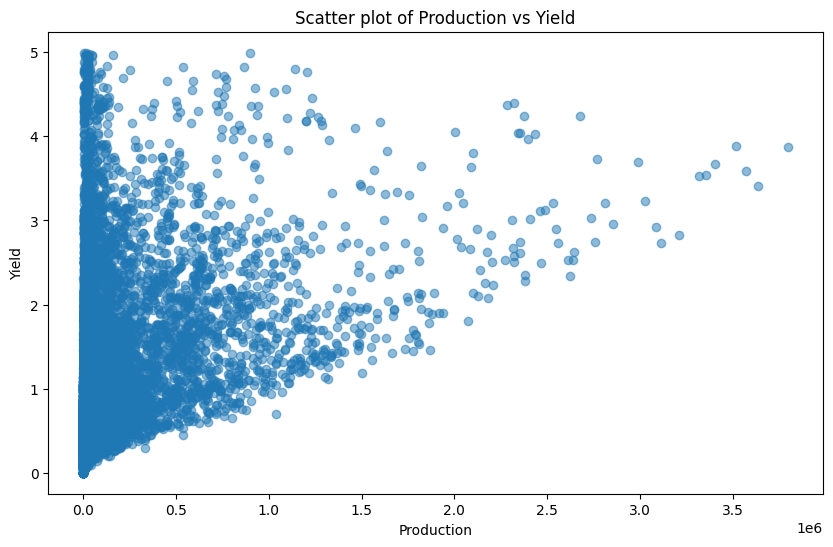

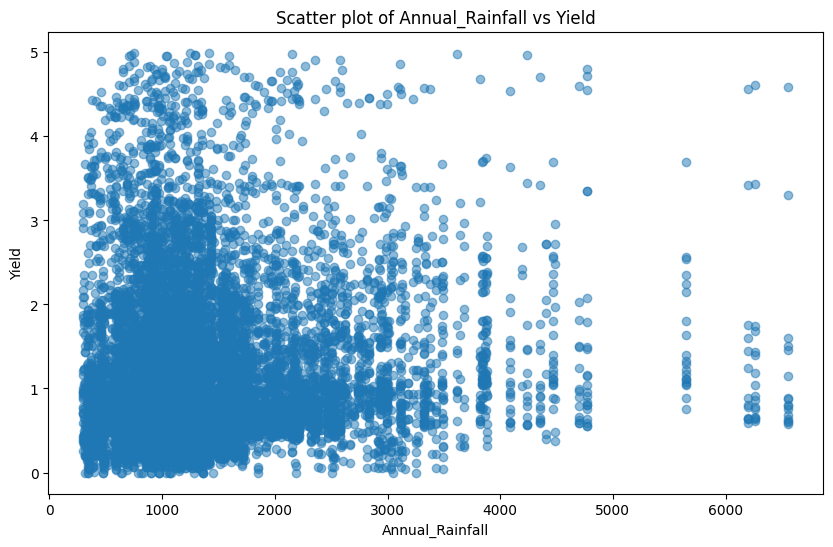

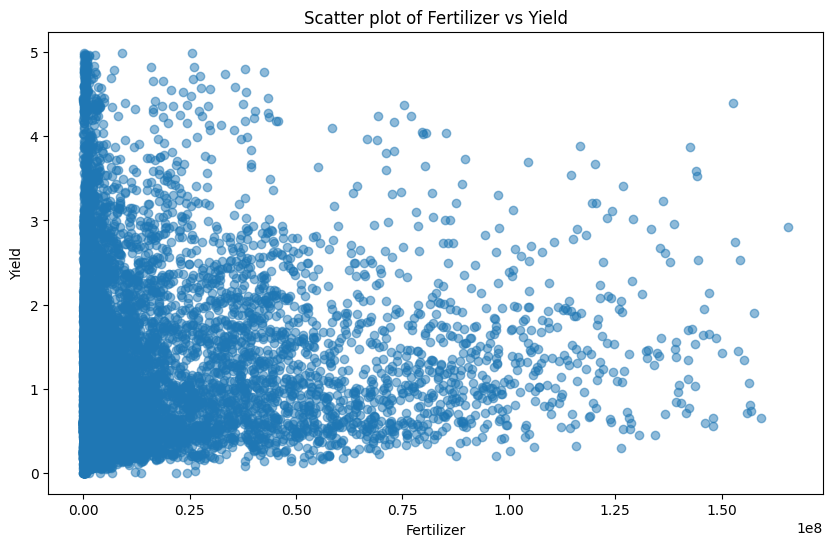

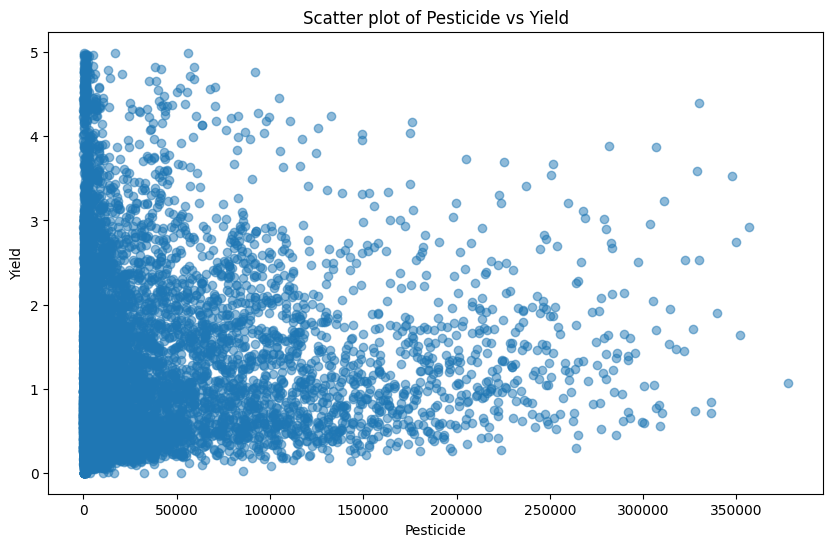

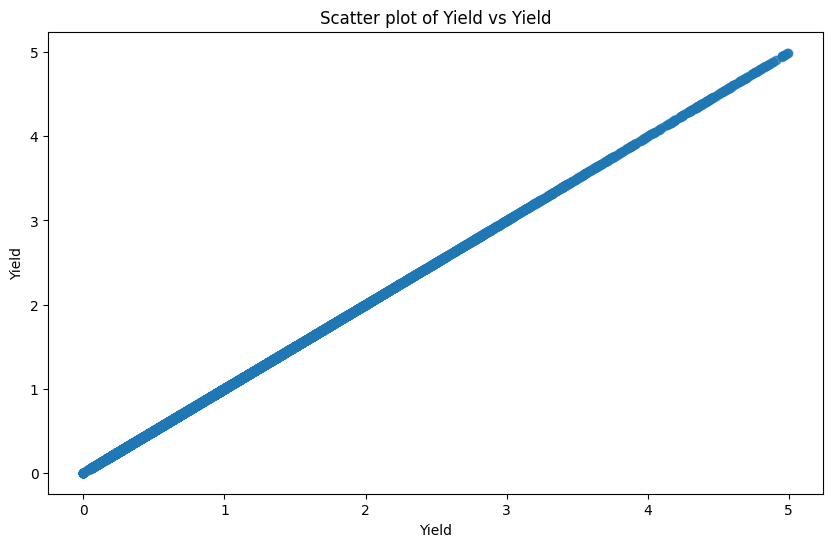

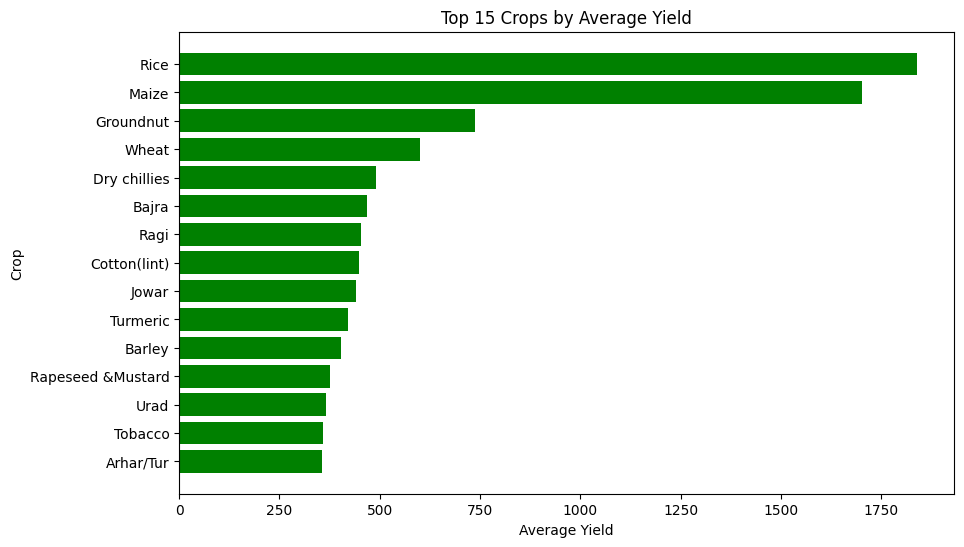

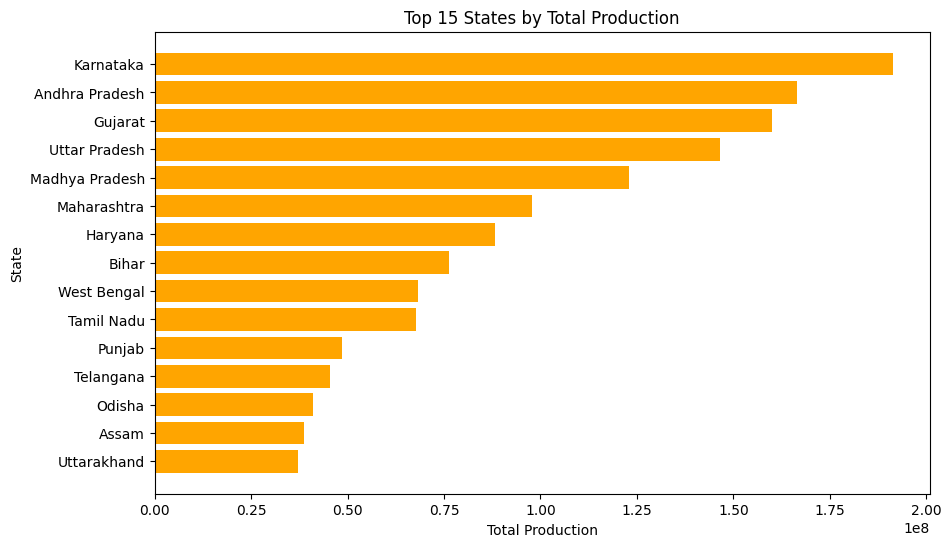

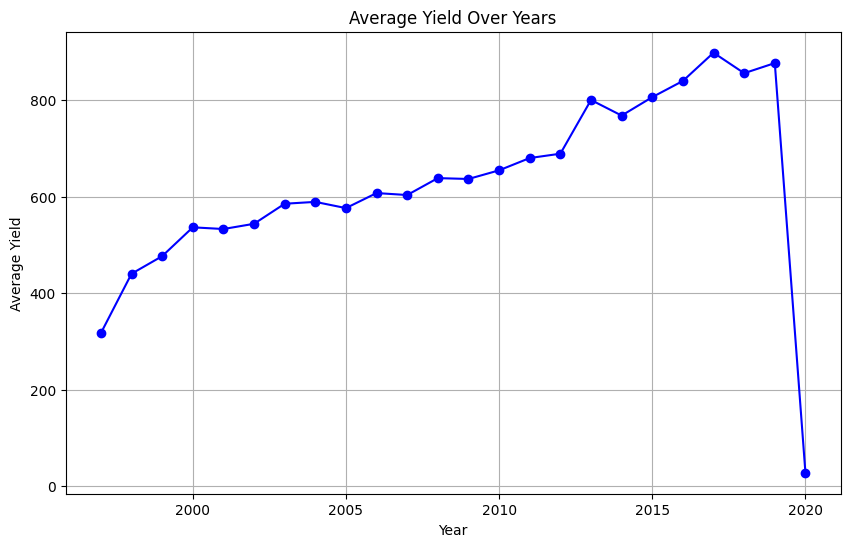

In [15]:
num_cols = ["Area", "Production", "Annual_Rainfall", "Fertilizer", "Pesticide", "Yield"]
for col in num_cols:
    plt.figure(figsize=(16,5))
    plt.hist(df[col], bins=500, color="skyblue", edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')

for col in num_cols:
    plt.figure(figsize=(16,2))
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

for col in num_cols:
    plt.figure(figsize=(10,6))
    plt.scatter(df[col], df["Yield"], alpha=0.5)
    plt.title(f"Scatter plot of {col} vs Yield")
    plt.xlabel(col)
    plt.ylabel("Yield")
    plt.show()

crop_yield = df.groupby("Crop")["Yield"].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
plt.barh(crop_yield.index, crop_yield.values, color="green")
plt.title("Top 15 Crops by Average Yield")
plt.xlabel("Average Yield")
plt.ylabel("Crop")
plt.gca().invert_yaxis()
plt.show()

# State-wise total production (top 15)
state_prod = df.groupby("State")["Production"].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
plt.barh(state_prod.index, state_prod.values, color="orange")
plt.title("Top 15 States by Total Production")
plt.xlabel("Total Production")
plt.ylabel("State")
plt.gca().invert_yaxis()
plt.show()

# Yield trend over years
year_yield = df.groupby("Crop_Year")["Yield"].sum()
plt.figure(figsize=(10,6))
plt.plot(year_yield.index, year_yield.values, marker="o", color="blue")
plt.title("Average Yield Over Years")
plt.xlabel("Year")
plt.ylabel("Average Yield")
plt.grid(True)
plt.show()